<a href="https://colab.research.google.com/github/UtkarshGupta12/Uber-Supply-Demand-Gap/blob/master/Uber_Suplly_Demand_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **UBER SUPPLY - DEMAND GAP**

---


>## PROBLEM STATEMENT 
Driver Cancellations and Non-Availability of cabs to and from Airport leading to loss of potential revenue.


>## OBJECTIVE
To identify the Supply-Demand gap in cabs from Airport to City and vice versa.

> ## Research Questions


1.   Identify the most pressing problems for Uber.
2.   Are the problems because of drivers .
3.  What is the gap between supply and demand to and from Airport.
4. What might be the reason for this supply demand gap.
5. Frequency of rides from Airport to city or city to Airport w.r.t time of day.
6. Recommend some ways to improve the supply-demand gap.







>## Data Used for Analysis
* The data used is only to and from Airport.
* Analysis has been done on data of 5 days.

>## How does UBER works ?
> **Create an account**

> >All you need is an email address and phone number. You can request a ride from your browser or from the Uber app. To download the app, go to the App Store or Google Play.

 >    **Enter your destination**

>>Open the app and enter where you’re going in the Where to? box. Tap to confirm your pickup location and tap Confirm again to be matched to a driver nearby.

> **Meet your driver**

>> You can track their arrival on the map. When they’re a few minutes away, wait for them at your pickup location.

> **Check your ride**

> >Every time you take a trip with Uber, please make sure you’re getting into the right car with the right driver by matching the license plate, car make and model, and driver photo with what’s provided in your app.

>>Uber trips can only be requested through the app, so never get in a car where the vehicle or driver identity doesn't match what’s displayed in your app.

> **Sit back and relax**

>> When you arrive, payment is easy. Depending on your region, you have options. Use cash or a payment method like a credit card or Uber Cash balance.

> **Rate your trip**

>>Let uber know how your trip went. You can also give your driver a compliment or add a tip in the app.






> ## COLUMNS DESCRIPTION
1. Request id - The unique id provided to a particular uber ride. 
2. Pickup point - The place where the Customer wishes to take the ride from.
3. Driver id - The unique identity provided to every driver of the Uber Cab.
4. Status - It shows whether the trip was completed , cancelled or No cabs were available.
5. Request timestamp - The date and time when the customer requested to ride the uber cab from a particular place.
6. Drop timestamp -The date and time when the customer reaches to a particular place.

># DATA CLEANING

---





In [0]:
#importing numpy and pandas
import numpy as np
import pandas as pd

In [0]:
#importing the data as df
df = pd.read_csv("https://raw.githubusercontent.com/UtkarshGupta12/Uber-Supply-Demand-Gap/master/Uber%20Request%20Data.csv")

In [45]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [47]:
#Counting different values of pickup point to be City or Airport.
df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [48]:
df['Driver id'].value_counts().tail()

143.0    8
123.0    7
42.0     7
300.0    6
265.0    6
Name: Driver id, dtype: int64

In [49]:
#Counting unique values of Status Column
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [50]:
#Counting null values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [0]:
#Splitting date and time to different columns
Time = df['Request timestamp'].str.split(" ",n=1,expand = True)
df['Request Date']=Time[0]
df['Request Time']=Time[1]
Time = df['Drop timestamp'].str.split(" ",n=1,expand = True)
df['Drop Date']=Time[0]
df['Drop Time']=Time[1]

In [52]:
#Removing Timestamp Columns to simplify data
df2=df
df2=df2.drop('Request timestamp',axis =1)
df2=df2.drop('Drop timestamp',axis =1)
df2.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,11/7/2016,11:51,11/7/2016,13:00
1,867,Airport,1.0,Trip Completed,11/7/2016,17:57,11/7/2016,18:47
2,1807,City,1.0,Trip Completed,12/7/2016,9:17,12/7/2016,9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016,21:08,12/7/2016,22:03
4,3112,City,1.0,Trip Completed,13-07-2016,08:33:16,13-07-2016,09:25:47


In [53]:
#Replacing '/' with '-' to get all the data in the same format
df2['Request Date']=df2['Request Date'].str.replace('/', '-')
import datetime as dt
#Converting into datetime format of day-month-year
df2['Request Date']=df2['Request Date'].apply(lambda x: dt.datetime.strptime(x,'%d-%m-%Y'))
df2.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,2016-07-11,11:51,11/7/2016,13:00
1,867,Airport,1.0,Trip Completed,2016-07-11,17:57,11/7/2016,18:47
2,1807,City,1.0,Trip Completed,2016-07-12,9:17,12/7/2016,9:58
3,2532,Airport,1.0,Trip Completed,2016-07-12,21:08,12/7/2016,22:03
4,3112,City,1.0,Trip Completed,2016-07-13,08:33:16,13-07-2016,09:25:47


In [54]:
df4=df2
#Extracting all the non null columns of Drop Time
df4 = df4[df4['Drop Time'].isnull() == False]
#Splitting hour , minutes and seconds
Test = df4['Drop Time'].str.split(':',n=2,expand = True)
#Filling seconds column with 0
Test=Test.fillna(0)
#Combining again to get the same format 
Test[3]=Test[0].astype(str) + ':' + Test[1].astype(str) + ':' + Test[2].astype(str)
Test[3]=Test[3].apply(lambda x: pd.to_timedelta(x))
#Getting a new column which has  datetime in proper format
df4['Drop Time']=Test[3]
df4=df4.drop('Pickup point',axis=1)
df4=df4.drop('Driver id',axis=1)
df4=df4.drop('Status',axis=1)
df4=df4.drop('Request Date',axis=1)
df4=df4.drop('Request Time',axis=1)
df4=df4.drop('Drop Date',axis=1)
#Merging original data with cleaned data wrt to unique Request id 
df5=pd.merge(df2,df4,how ='outer',on='Request id')
df5=df5.drop('Drop Time_x',axis =1)
df5['Drop Time']=df5['Drop Time_y']
df5 = df5.drop('Drop Time_y',axis=1)
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,2016-07-11,11:51,11/7/2016,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11,17:57,11/7/2016,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12,9:17,12/7/2016,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12,21:08,12/7/2016,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13,08:33:16,13-07-2016,09:25:47


In [55]:
#Splitting hour , minutes and seconds
Test = df5['Request Time'].str.split(':',n=2,expand=True)
#Filling seconds column with 0
Test=Test.fillna(0)
#Combining again to get the same format
Test[3]=Test[0].astype('str')+':'+Test[1].astype('str')+':'+Test[2].astype('str')
Test[3]=Test[3].apply(lambda x: pd.to_timedelta(x))
df5['Request Time']=Test[3]
df3=df5
df3['Drop Date']=df3['Drop Date'].str.replace('/','-')
df3.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,2016-07-11,11:51:00,11-7-2016,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11,17:57:00,11-7-2016,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12,09:17:00,12-7-2016,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12,21:08:00,12-7-2016,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13,08:33:16,13-07-2016,09:25:47


In [56]:
#Selecting non-null objects from the Drop Date column
df3 = df3[df3['Drop Date'].isnull() == False]
#Combining again to get the same format
df3['Drop Date']=df3['Drop Date'].astype(str).apply(lambda x: dt.datetime.strptime(x,'%d-%m-%Y'))
df3=df3.drop('Pickup point',axis=1)
df3=df3.drop('Driver id',axis=1)
df3=df3.drop('Status',axis=1)
df3=df3.drop('Request Date',axis=1)
df3=df3.drop('Request Time',axis=1)
df3=df3.drop('Drop Time',axis=1)
#Merging original data with cleaned data wrt to unique Request id 
df1 = pd.merge(df5,df3,how='outer',on = 'Request id')
df1 = df1.drop('Drop Date_x',axis =1)
df1['Drop Date']=df1['Drop Date_y']
df1=df1.drop('Drop Date_y',axis=1)
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Time,Drop Date
0,619,Airport,1.0,Trip Completed,2016-07-11,11:51:00,13:00:00,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11,17:57:00,18:47:00,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12,09:17:00,09:58:00,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12,21:08:00,22:03:00,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13,08:33:16,09:25:47,2016-07-13


In [57]:
#Filling NaN with 0 so that it can be counted as integer
df1['Driver id']=df1['Driver id'].fillna(0).astype('int')
#Locating only Airport customers
df3=df1.loc[df1['Pickup point']=='Airport']
df3 = df3[df3['Drop Time'].isnull()==False]
#Calculating journey time 
df3['Journey Time']=df3['Drop Time'] - df3['Request Time']
df3.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Time,Drop Date,Journey Time
0,619,Airport,1,Trip Completed,2016-07-11,11:51:00,13:00:00,2016-07-11,01:09:00
1,867,Airport,1,Trip Completed,2016-07-11,17:57:00,18:47:00,2016-07-11,00:50:00
3,2532,Airport,1,Trip Completed,2016-07-12,21:08:00,22:03:00,2016-07-12,00:55:00
5,3879,Airport,1,Trip Completed,2016-07-13,21:57:28,22:28:59,2016-07-13,00:31:31
6,4270,Airport,1,Trip Completed,2016-07-14,06:15:32,07:13:15,2016-07-14,00:57:43


># DATA DESCRIPTION 

---



In [58]:
df3.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Time,Drop Date,Journey Time
0,619,Airport,1,Trip Completed,2016-07-11,11:51:00,13:00:00,2016-07-11,01:09:00
1,867,Airport,1,Trip Completed,2016-07-11,17:57:00,18:47:00,2016-07-11,00:50:00
3,2532,Airport,1,Trip Completed,2016-07-12,21:08:00,22:03:00,2016-07-12,00:55:00
5,3879,Airport,1,Trip Completed,2016-07-13,21:57:28,22:28:59,2016-07-13,00:31:31
6,4270,Airport,1,Trip Completed,2016-07-14,06:15:32,07:13:15,2016-07-14,00:57:43


In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 0 to 2830
Data columns (total 9 columns):
Request id      1327 non-null int64
Pickup point    1327 non-null object
Driver id       1327 non-null int64
Status          1327 non-null object
Request Date    1327 non-null datetime64[ns]
Request Time    1327 non-null timedelta64[ns]
Drop Time       1327 non-null timedelta64[ns]
Drop Date       1327 non-null datetime64[ns]
Journey Time    1327 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(2), timedelta64[ns](3)
memory usage: 103.7+ KB


In [60]:
df3.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Time,Drop Date,Journey Time
count,1327.000000,1327,1327.000000,1327,1327,1327,1327,1327,1327
unique,NaN,1,NaN,1,5,NaN,NaN,6,NaN
top,NaN,Airport,NaN,Trip Completed,2016-07-13 00:00:00,NaN,NaN,2016-07-13 00:00:00,NaN
freq,NaN,1327,NaN,1327,298,NaN,NaN,296,NaN
first,NaN,NaN,NaN,NaN,2016-07-11 00:00:00,NaN,NaN,2016-07-11 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2016-07-15 00:00:00,NaN,NaN,2016-07-16 00:00:00,NaN
mean,3253.578749,NaN,146.243406,NaN,NaN,0 days 13:31:58.471740,0 days 13:19:06.225320,NaN,-1 days +23:47:07.753579
std,1970.929964,NaN,86.050944,NaN,NaN,0 days 06:25:51.680364,0 days 06:40:34.056548,NaN,0 days 04:58:54.831168
min,1.000000,NaN,1.000000,NaN,NaN,0 days 00:00:00,0 days 00:01:05,NaN,-1 days +00:30:19
25%,1572.000000,NaN,72.000000,NaN,NaN,0 days 07:46:51,0 days 07:50:00,NaN,0 days 00:39:16.500000


># UNIVARIATE ANALYSIS

---



In [61]:
df22 = df1
#Grouping Status columns to count wrt to date 
df22=df22.groupby('Status')
df22['Request Date'].value_counts()

Status             Request Date
Cancelled          2016-07-13      270
                   2016-07-11      262
                   2016-07-14      252
                   2016-07-12      240
                   2016-07-15      240
No Cars Available  2016-07-15      580
                   2016-07-14      571
                   2016-07-12      505
                   2016-07-11      504
                   2016-07-13      490
Trip Completed     2016-07-11      601
                   2016-07-13      577
                   2016-07-12      562
                   2016-07-15      561
                   2016-07-14      530
Name: Request Date, dtype: int64

In [62]:
#Locating Completed trip in Status Column
df1.loc[(df1['Status']=='Trip Completed')]
#Calculating Duration Time
df1['Trip Duration']=df1['Drop Time'] - df1['Request Time']
#Obtaining different Request date and Drop Date
df1.loc[df1['Request Date'] != df1['Drop Date']]
#Obtaining the Request time stamp by converting into string for further use
df['Request_Timestamp']=df1['Request Date'].astype('str')+' '+df1['Request Time'].astype(str)
#Obtaining the Request time stamp by converting into string for further use
df['Drop_Timestamp']=df1['Drop Date'].astype('str')+' '+df1['Drop Time'].astype(str)
#Removing latter zeroes from string
df['Request_Timestamp']=df['Request_Timestamp'].str.replace(r'.000000000', '')
df['Drop_Timestamp']=df['Drop_Timestamp'].str.replace(r'.000000000', '')
#Converting into Datetime format
df['Request_Timestamp']=df['Request_Timestamp'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d 0 days %H:%M:%S'))
df0=df
df0 = df0[df0['Drop_Timestamp'].isnull()==False]
#Obtaining Non-Null Values
df0 = df0[df0['Drop_Timestamp'] != 'NaT NaT']
#Converting into Datetime format
df0['Drop_Timestamp']=df0['Drop_Timestamp'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d 0 days %H:%M:%S'))
#Calculating duration
df0['Duration'] = df0['Drop_Timestamp'] - df0['Request_Timestamp']
df0=df0.drop('Pickup point',axis=1)
df0=df0.drop('Driver id',axis=1)
df0=df0.drop('Status',axis=1)
df0=df0.drop('Request timestamp',axis=1)
df0=df0.drop('Drop timestamp',axis=1)
df0=df0.drop('Request Date',axis=1)
df0=df0.drop('Drop Date',axis=1)
df0=df0.drop('Request Time',axis=1)
df0=df0.drop('Drop Time',axis=1)
df0=df0.drop('Request_Timestamp',axis=1)
df0=df0.drop('Drop_Timestamp',axis=1)
#Merging wrt to Request id 
df2 = pd.merge(df1,df0,how='outer',on = 'Request id')
df2 = df2.drop('Trip Duration',axis=1)
#Dividing into different components to obtain time slot for 6 hours of gaps
df2 = df2.assign(Time_Slot = pd.cut(df2['Request Time'].dt.components['hours'] ,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
df2.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Time,Drop Date,Duration,Time_Slot
0,619,Airport,1,Trip Completed,2016-07-11,11:51:00,13:00:00,2016-07-11,01:09:00,Morning
1,867,Airport,1,Trip Completed,2016-07-11,17:57:00,18:47:00,2016-07-11,00:50:00,Afternoon
2,1807,City,1,Trip Completed,2016-07-12,09:17:00,09:58:00,2016-07-12,00:41:00,Morning
3,2532,Airport,1,Trip Completed,2016-07-12,21:08:00,22:03:00,2016-07-12,00:55:00,Evening
4,3112,City,1,Trip Completed,2016-07-13,08:33:16,09:25:47,2016-07-13,00:52:31,Morning


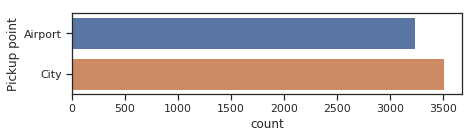

In [63]:
plt.figure(figsize=(7, 1.5))
sns.countplot(y='Pickup point',data =df2)
plt.show()

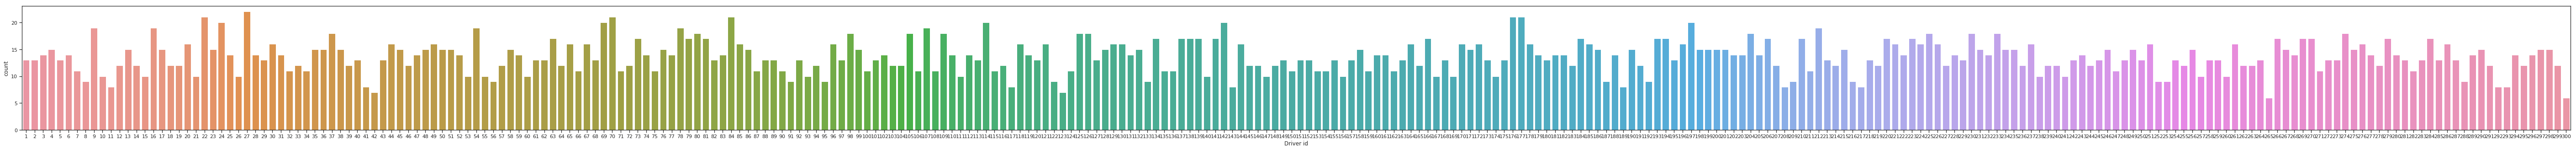

In [64]:
df1 = df1.loc[df2['Driver id'] != 0]
plt.figure(figsize=(100,5))
sns.countplot(x='Driver id',data =df1)
plt.show()

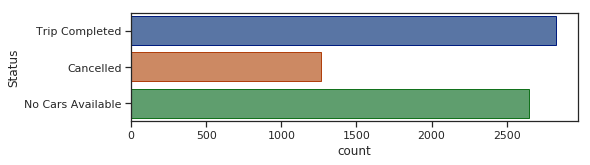

In [65]:
plt.figure(figsize=(8,2))
sns.countplot(y='Status',data=df2,edgecolor=sns.color_palette("dark", 3))
plt.show()

Text(0, 0.5, 'Frequency')

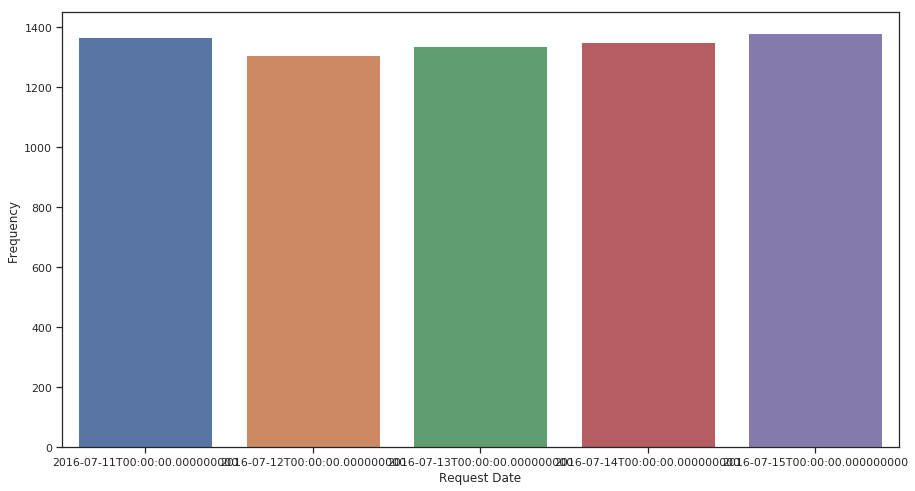

In [103]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='Request Date',data=df2)
plt.ylabel('Frequency')

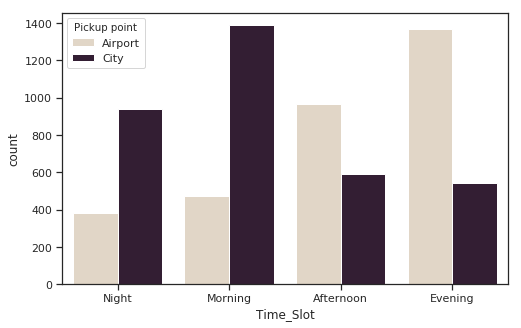

In [90]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Time_Slot',data=df2,palette="ch:.25",hue='Pickup point')

In [104]:
#Dividing using the cut function to get different hours.
df3=df2
df3 = df3.assign(Request_Hour = pd.cut(df2['Request Time'].dt.components['hours'] ,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],labels=['1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24','0-1']))
plt.figure(figsize=(15,4))

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

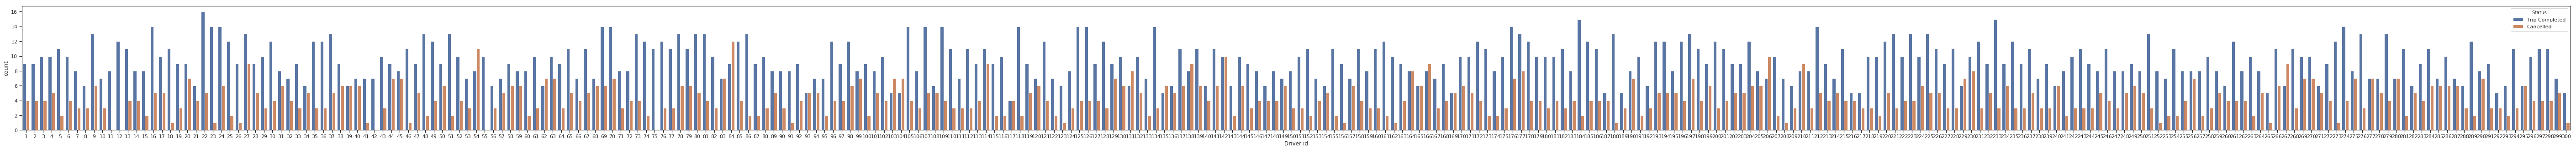

In [69]:
df1 = df2
df1 = df1.loc[df1['Driver id'] != 0]
plt.figure(figsize=(100,5))
sns.countplot(x='Driver id',hue='Status',data=df1)
plt.show()

In [70]:
df1 = df2
df1 = df1.loc[df1['Pickup point'] == 'Airport']
df1=df1.groupby('Time_Slot')
sns.set(style="ticks", color_codes=True)
df3 = df2
df3 = df3.drop('Driver id',axis =1)
df3 = df3.drop('Request Date',axis =1)
df3 = df3.drop('Request Time',axis =1)
df3 = df3.drop('Drop Date',axis =1)
df3 = df3.drop('Drop Time',axis =1)
df3 = df3.drop('Duration',axis =1)
#To count values in different Time Slots
df3 = df3.groupby('Time_Slot')
df3['Status'].count().sort_values(ascending = False)

Time_Slot
Evening      1912
Morning      1858
Afternoon    1554
Night        1322
Name: Status, dtype: int64

># BIVARIATE ANALYSIS

---



In [71]:
df1 = df2
#Creating a pivot table 
df1.pivot_table(values = 'Request id', 
                      index = ['Time_Slot','Pickup point'], 
                      columns = 'Status', 
                      aggfunc = 'count')

Status                  Cancelled  No Cars Available  Trip Completed
Time_Slot Pickup point                                              
Night     Airport              10                125             246
          City                373                288             280
Morning   Airport              39                 51             381
          City                579                335             473
Afternoon Airport              74                574             317
          City                 57                164             368
Evening   Airport              75                933             360
          City                 54                124             366

In [72]:
df3 = df1.loc[df1['Pickup point']=='Airport']
df00 =df3.pivot_table(values = 'Request id', 
                      index = 'Time_Slot', 
                      columns = 'Status', 
                      aggfunc = 'count')
#Making the index as a separate column
df00['Time_Slot']=df00.index
df00

Status,Cancelled,No Cars Available,Trip Completed,Time_Slot
Time_Slot,,,,
Night,10,125,246,Night
Morning,39,51,381,Morning
Afternoon,74,574,317,Afternoon
Evening,75,933,360,Evening


In [73]:
df00.corr()

Status,Cancelled,No Cars Available,Trip Completed
Status,,,
Cancelled,1.000000,0.838913,0.578606
No Cars Available,0.838913,1.000000,0.262539
Trip Completed,0.578606,0.262539,1.000000


In [74]:
#Creating a column with Total Requests by summing up other columns
df00['Total_Requests']=df00['Cancelled']+df00['No Cars Available']+df00['Trip Completed']
#Calculating percentage of the given column 
df00['Trip Completed %']=round((df00['Trip Completed']/df00['Total_Requests'])*100,2) 
df00['No Cars Available %']=round((df00['No Cars Available']/df00['Total_Requests'])*100,2)
df00['Cancelled %']=round((df00['Cancelled']/df00['Total_Requests'])*100,2)
#Locating pickup point = City
df3 = df1.loc[df1['Pickup point']=='City']
df01 =df3.pivot_table(values = 'Request id', 
                      index = 'Time_Slot', 
                      columns = 'Status', 
                      aggfunc = 'count')
df01['Time_Slot']=df01.index
#Repeating the steps again as done above
df01['Total_Requests']=df01['Cancelled']+df01['No Cars Available']+df01['Trip Completed']
df01['Trip Completed %']=round((df01['Trip Completed']/df01['Total_Requests'])*100,2) 
df01['No Cars Available %']=round((df01['No Cars Available']/df01['Total_Requests'])*100,2)
df01['Cancelled %']=round((df01['Cancelled']/df01['Total_Requests'])*100,2)
df00

Status,Cancelled,No Cars Available,Trip Completed,Time_Slot,Total_Requests,Trip Completed %,No Cars Available %,Cancelled %
Time_Slot,,,,,,,,
Night,10,125,246,Night,381,64.57,32.81,2.62
Morning,39,51,381,Morning,471,80.89,10.83,8.28
Afternoon,74,574,317,Afternoon,965,32.85,59.48,7.67
Evening,75,933,360,Evening,1368,26.32,68.20,5.48


In [75]:
df01

Status,Cancelled,No Cars Available,Trip Completed,Time_Slot,Total_Requests,Trip Completed %,No Cars Available %,Cancelled %
Time_Slot,,,,,,,,
Night,373,288,280,Night,941,29.76,30.61,39.64
Morning,579,335,473,Morning,1387,34.10,24.15,41.74
Afternoon,57,164,368,Afternoon,589,62.48,27.84,9.68
Evening,54,124,366,Evening,544,67.28,22.79,9.93


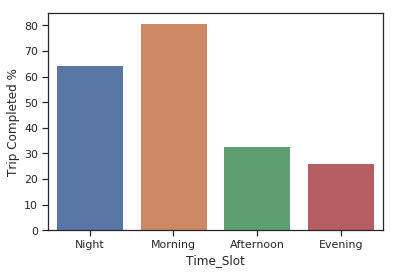

In [76]:
sns.barplot(x='Time_Slot',y='Trip Completed %',data=df00)

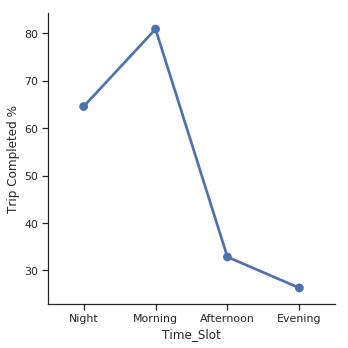

In [77]:
sns.catplot(x="Time_Slot", y="Trip Completed %", kind="point", data=df00)

># MULTIVARIATE ANALYSIS

---



In [78]:
#Using the melt function to obtain Status as a separate column
df001 = pd.melt(df01,id_vars=['Time_Slot'],value_vars=['Trip Completed','No Cars Available','Cancelled'])
df001

,Time_Slot,Status,value
0,Night,Trip Completed,280
1,Morning,Trip Completed,473
2,Afternoon,Trip Completed,368
3,Evening,Trip Completed,366
4,Night,No Cars Available,288
5,Morning,No Cars Available,335
6,Afternoon,No Cars Available,164
7,Evening,No Cars Available,124
8,Night,Cancelled,373
9,Morning,Cancelled,579


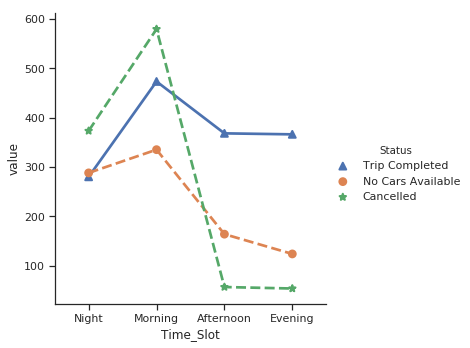

In [79]:
#Plotting Point Graph
sns.catplot(x="Time_Slot", y="value", kind="point",hue ='Status', markers=["^", "o","*"], linestyles=["-", "--","--"],data=df001)

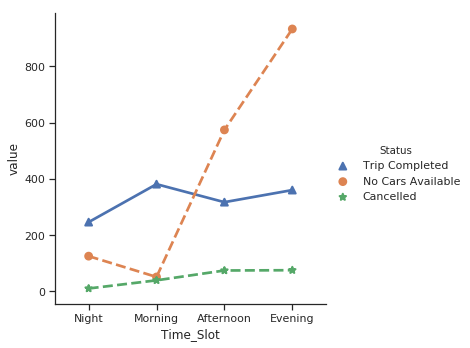

In [80]:
#Using the melt function to obtain Status as a separate column
df002 = pd.melt(df00,id_vars=['Time_Slot'],value_vars=['Trip Completed','No Cars Available','Cancelled'])
#Plotting Point graph
sns.catplot(x="Time_Slot", y="value", kind="point",hue ='Status', markers=["^", "o","*"], linestyles=["-", "--","--"],data=df002)